In [102]:
from keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [103]:
IMAGE_SIZE = [224, 224]

In [104]:
train_directory='./Bachelorwork/processed dataset/train'
test_directory='./Bachelorwork/processed dataset/test'

In [105]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False

In [106]:
folders = glob('./Bachelorwork/processed dataset/train/*')
len(folders)

484

In [107]:
x = Flatten()(vgg.output)


x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 

prediction = Dense(len(folders), activation='softmax')(x)

In [108]:
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [109]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [110]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2801 images belonging to 484 classes.
Found 1614 images belonging to 484 classes.


In [111]:
print(len(training_set))
print(len(test_set))

88
51


In [112]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=79,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/79
88/88 [==============================] - 340s 4s/step - loss: 6.2920 - accuracy: 0.0043 - val_loss: 6.0813 - val_accuracy: 0.0081
Epoch 2/79
88/88 [==============================] - 338s 4s/step - loss: 5.9553 - accuracy: 0.0114 - val_loss: 5.6700 - val_accuracy: 0.0173
Epoch 3/79
88/88 [==============================] - 337s 4s/step - loss: 5.3681 - accuracy: 0.0368 - val_loss: 5.0441 - val_accuracy: 0.0403
Epoch 4/79
88/88 [==============================] - 338s 4s/step - loss: 4.7274 - accuracy: 0.0543 - val_loss: 4.5259 - val_accuracy: 0.0843
Epoch 5/79
88/88 [==============================] - 338s 4s/step - loss: 4.0912 - accuracy: 0.1125 - val_loss: 4.0586 - val_accuracy: 0.1103
Epoch 6/79
88/88 [==============================] - 339s 4s/step - loss: 3.5860 - accuracy: 0.1635 - val_loss: 3.8652 - val_accuracy: 0.1462
Epoch 7/79
88/88 [==============================] - 339s 4s/step - loss: 3.2064 - accuracy: 0.2014 - val_loss: 3.7130 - val_accuracy: 0.1636
Epoch 8/79
88

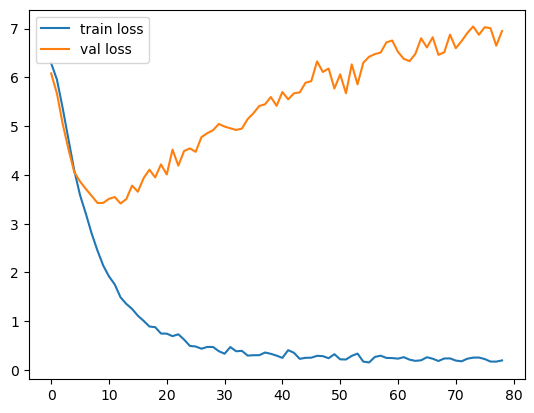

In [113]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

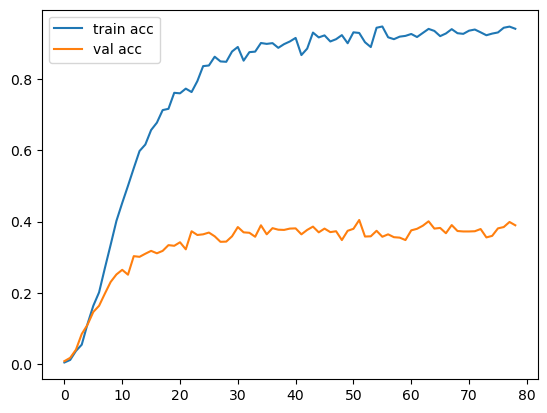

In [114]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [115]:
model.save('FS.h5')

In [116]:
from keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array

model1 = load_model('./FS.h5',compile=False)  

In [131]:
lab = training_set.class_indices
print(training_set.class_indices)
lab={k:v for v,k in lab.items()}

{'A73EGS': 0, 'Acanthaluteres Browni': 1, 'Acanthaluteres Spilomentarus': 2, 'Acanthaluteres Vittiger': 3, 'Acanthistius Cinctus': 4, 'Acanthopagrus Australis': 5, 'Acanthopagrus Breda': 6, 'Acanthopagrus Latus': 7, 'Achoerodus Ouldii': 8, 'Achoerodus Viridis': 9, 'Acreichthys Tomentosus': 10, 'Aesopia Cornuta': 11, 'Aethaloperca Rogaa': 12, 'Alectis Ciliaris': 13, 'Alectis Indica': 14, 'Alepes Kleinii': 15, 'Aluterus Monoceros': 16, 'Aluterus Scriptus': 17, 'Amanses Scopas': 18, 'Anampses Caeruleopunctatu': 19, 'Anampses Elegans': 20, 'Anampses Femininus': 21, 'Anampses Geographicus': 22, 'Anampses Lennardi': 23, 'Anampses Melanurus': 24, 'Anampses Meleagrrides': 25, 'Anampses Neoguinaicus': 26, 'Anampses Twistii': 27, 'Anodontostoma Chacunda': 28, 'Anyperodon Leucogrammicus': 29, 'Aphareus Furca': 30, 'Aphareus Rutilans': 31, 'Aprion Virescens': 32, 'Argyrops Spinifer': 33, 'Aseraggodes Melanstictus': 34, 'Atractoscion Aequidens': 35, 'Atule Mate': 36, 'Auxis Rochei': 37, 'Auxix Thaz

In [128]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res